In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sea
from tqdm.notebook import tqdm

In [2]:
path_train = "/Users/matildereis/Desktop/dataset/Train"
path_test = "/Users/matildereis/Desktop/dataset/Test"

def load_data(PATH):
    filenames, fruit, fresh = [], [], []
    
    for file in tqdm(os.listdir(PATH)):
        folder_path = os.path.join(PATH, file)

        if not os.path.isdir(folder_path):
            continue
        
        # percorrer as imagens dentro da pasta
        for img in os.listdir(folder_path):

            # se começar com 'f' = fresh, senão = rotten
            fresh.append(0 if file[0] == 'f' else 1)
            
            # extrair o nome da fruta: 5 letras para fresh, 6 para rotten
            fruit.append(file[5:] if file[0] == 'f' else file[6:])
            filenames.append(os.path.join(folder_path, img))
    

    df = pd.DataFrame({
        'filename': filenames,
        'fruit': fruit,  # tipo de fruta
        'fresh': fresh   # 0 = fresh, 1 = rotten
    })
    
    return df

df_train = load_data(path_train).sample(frac=1)
df_test = load_data(path_test).sample(frac=1)

print("Número de imagens no conjunto de treino:")
print(df_train.shape)

print("\n Número de imagens no conjunto de teste:")
print(df_test.shape)

print("\nTipos de frutas no conjunto de treino:")
print(df_train['fruit'].unique())


print("\nTipos de frutas no conjunto de teste:")
print(df_test['fruit'].unique())


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Número de imagens no conjunto de treino:
(23619, 3)

 Número de imagens no conjunto de teste:
(6738, 3)

Tipos de frutas no conjunto de treino:
['tomato' 'banana' 'cucumber' 'bittergroud' 'apples' 'potato' 'oranges'
 'capsicum' 'okra']

Tipos de frutas no conjunto de teste:
['apples' 'cucumber' 'oranges' 'banana' 'tamto' 'patato' 'okra']


In [3]:
df_train.head()

,filename,fruit,fresh
4750,/Users/matildereis/Desktop/dataset/Train/fresh...,tomato,0
1030,/Users/matildereis/Desktop/dataset/Train/fresh...,banana,0
22769,/Users/matildereis/Desktop/dataset/Train/fresh...,cucumber,0
22219,/Users/matildereis/Desktop/dataset/Train/rotte...,bittergroud,1
6666,/Users/matildereis/Desktop/dataset/Train/rotte...,tomato,1


In [4]:
df_train = df_train[~df_train['fruit'].isin(['apples', 'bittergroud', 'okra'])]

df_test = df_test[~df_test['fruit'].isin(['apples', 'okra'])]

df_test['fruit'] = df_test['fruit'].map(lambda x: 'tomato' if x == 'tamto' else x)
df_test['fruit'] = df_test['fruit'].map(lambda x: 'potato' if x == 'patato' else x)

print(df_train['fruit'].unique())
print(df_test['fruit'].unique())

['tomato' 'banana' 'cucumber' 'potato' 'oranges' 'capsicum']
['cucumber' 'oranges' 'banana' 'tomato' 'potato']


In [5]:
df = pd.concat([df_train, df_test], axis = 0)
df.shape

(20655, 3)

# Distribuição das categorias

       fruit  fresh  count
0     banana      0   3360
1     banana      1   3832
2   capsicum      0    990
3   capsicum      1    901
4   cucumber      0    775
5   cucumber      1    676
6    oranges      0   1854
7    oranges      1   1998
8     potato      0    806
9     potato      1   1172
10    tomato      0   2113
11    tomato      1   2178


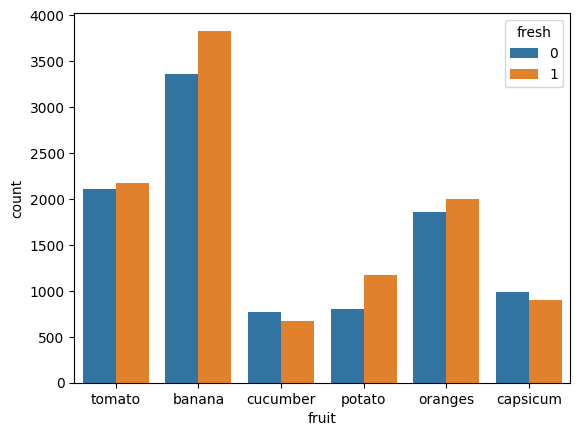

In [6]:
sea.countplot(x = 'fruit', data = df, hue = 'fresh')

class_distribution = df.groupby(['fruit', 'fresh']).size().reset_index(name='count')

# Display the distribution
print(class_distribution)

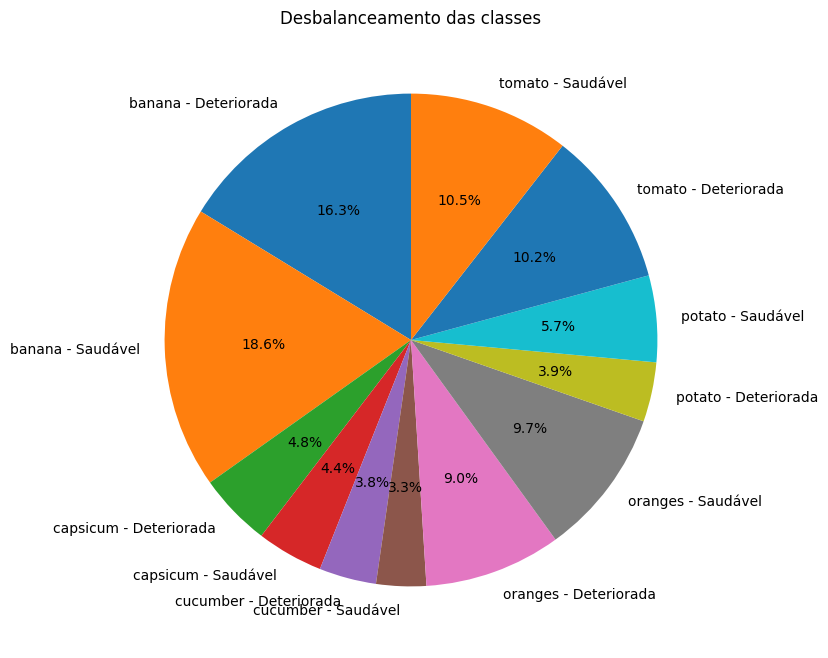

In [7]:
import matplotlib.pyplot as plt

# Desbalanceamento das classes
class_distribution['label'] = class_distribution['fruit'] + ' - ' + class_distribution['fresh'].map({1:'Saudável', 0:'Deteriorada'})

# Pie chart único
plt.figure(figsize=(8,8))
plt.pie(class_distribution['count'], labels=class_distribution['label'], autopct='%1.1f%%', startangle=90)
plt.title('Desbalanceamento das classes')
plt.show()


In [8]:
# o dataset está desbalanceado

counts = df['fruit'].value_counts()
counts

fruit
banana      7192
tomato      4291
oranges     3852
potato      1978
capsicum    1891
cucumber    1451
Name: count, dtype: int64

In [9]:
df_new = pd.DataFrame(columns=['filename', 'fruit', 'fresh'])

# número máximo de amostras por fruta
max_samples = 800


for (key, value) in counts.items():
    
    if value > 1400:
        df_temp = df[df['fruit'] == key].sample(n=max_samples)
    else:
        df_temp = df[df['fruit'] == key]
    
    df_new = pd.concat([df_new, df_temp], axis=0)

df_new = df_new.sample(frac=1).reset_index(drop=True)

print(df_new.shape)
print(df_new['fruit'].value_counts())


(4800, 3)
fruit
potato      800
cucumber    800
oranges     800
tomato      800
capsicum    800
banana      800
Name: count, dtype: int64


In [10]:
df_new.shape

(4800, 3)

In [11]:
df_new.head()

,filename,fruit,fresh
0,/Users/matildereis/Desktop/dataset/Train/fresh...,potato,0
1,/Users/matildereis/Desktop/dataset/Train/fresh...,cucumber,0
2,/Users/matildereis/Desktop/dataset/Train/rotte...,oranges,1
3,/Users/matildereis/Desktop/dataset/Train/rotte...,tomato,1
4,/Users/matildereis/Desktop/dataset/Train/rotte...,potato,1


In [12]:
df_new.head().to_csv('df_novo.csv', index=False)

<Axes: xlabel='fruit', ylabel='count'>

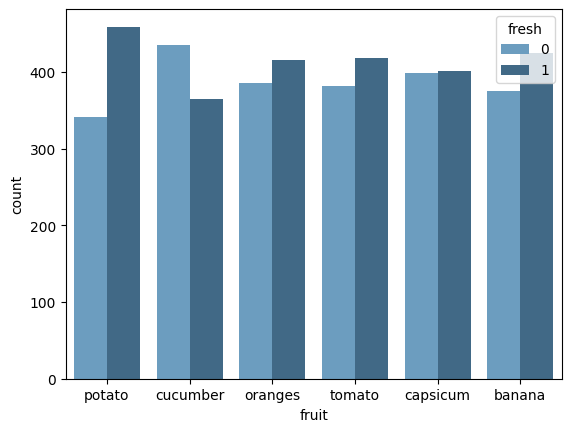

In [13]:
sea.countplot(x = 'fruit', data = df_new, hue = 'fresh',palette = 'Blues_d')

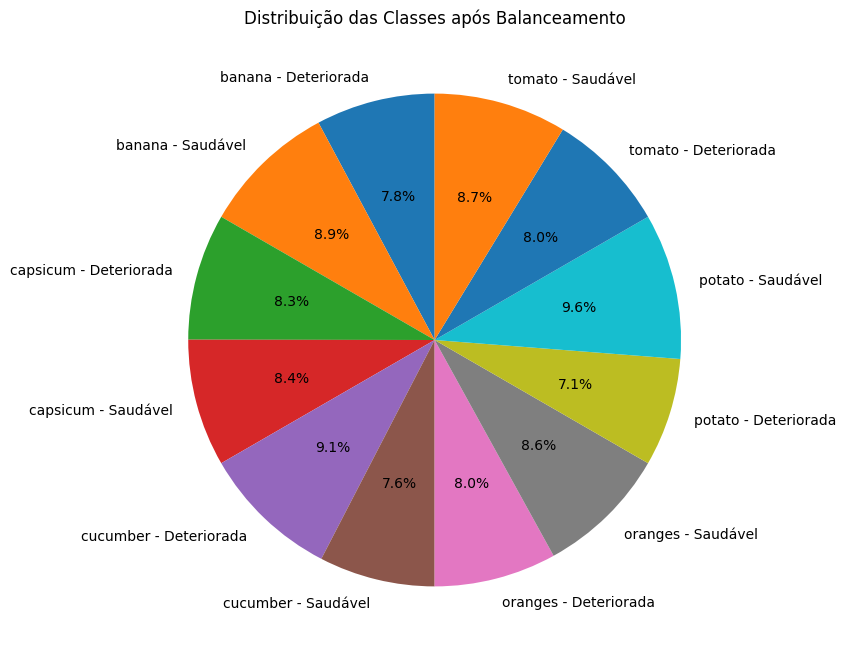

In [14]:
import pandas as pd

# Agrupar os dados (igual ao countplot mas resumido)
class_distribution_new = df_new.groupby(['fruit', 'fresh']).size().reset_index(name='count')

# Criar uma coluna com labels combinados
class_distribution_new['label'] = class_distribution_new['fruit'] + ' - ' + class_distribution_new['fresh'].map({1: 'Saudável', 0: 'Deteriorada'})

# Criar o pie chart
plt.figure(figsize=(8,8))
plt.pie(
    class_distribution_new['count'], 
    labels=class_distribution_new['label'], 
    autopct='%1.1f%%', 
    startangle=90
)

plt.title('Distribuição das Classes após Balanceamento')
plt.show()

In [15]:
# Mostrar a contagem por categoria
print(class_distribution_new[['label', 'count']])


                     label  count
0     banana - Deteriorada    375
1        banana - Saudável    425
2   capsicum - Deteriorada    399
3      capsicum - Saudável    401
4   cucumber - Deteriorada    435
5      cucumber - Saudável    365
6    oranges - Deteriorada    385
7       oranges - Saudável    415
8     potato - Deteriorada    341
9        potato - Saudável    459
10    tomato - Deteriorada    382
11       tomato - Saudável    418


# Treino e Validação

In [16]:
df_new['fruit_label'] = df_new['fruit'].astype('category').cat.codes


In [22]:
# 1) Split estratificado 70/15/15
from sklearn.model_selection import train_test_split

# df_new tem: filename, fruit, fresh, fruit_label
df_train, df_temp = train_test_split(df_new, test_size=0.30, stratify=df_new['fruit_label'], random_state=42)

df_val, df_test = train_test_split(df_temp, test_size=0.50, stratify=df_temp['fruit_label'], random_state=42)

for d in (df_train, df_val, df_test):
    d['fruit_label'] = d['fruit_label'].astype(int)
    d['fresh']       = d['fresh'].astype(int)



In [24]:
# 2) Transforms
from torchvision import transforms
def get_transforms(training: bool):
    if training:
        return transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.RandomHorizontalFlip(0.5),
            transforms.RandomRotation(10),
            transforms.ColorJitter(0.2,0.2,0.2),
            transforms.ToTensor(),
            transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
        ])
    else:
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
        ])

In [25]:
# 3) Dataset + DataLoaders
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class FruitDataset(Dataset):
    def __init__(self, df, training=True):
        self.df = df.reset_index(drop=True)
        self.tf = get_transforms(training)
    def __len__(self): return len(self.df)
    def __getitem__(self, i):
        row = self.df.iloc[i]
        x = self.tf(Image.open(row["filename"]).convert("RGB"))
        y_fruit = torch.tensor(int(row["fruit_label"]), dtype=torch.long)
        y_fresh = torch.tensor(int(row["fresh"]),       dtype=torch.long)
        return x, y_fruit, y_fresh

train_loader = DataLoader(FruitDataset(df_train, True),  batch_size=32, shuffle=True)
val_loader   = DataLoader(FruitDataset(df_val,   False), batch_size=32)
test_loader  = DataLoader(FruitDataset(df_test,  False), batch_size=32)
# Verificar os DataLoaders
for images, fruit_labels, fresh_labels in train_loader:
    print("Imagens:", images.shape)
    print("Rótulos de Fruta:", fruit_labels)
    print("Rótulos de Frescura:", fresh_labels)
    break

Imagens: torch.Size([32, 3, 224, 224])
Rótulos de Fruta: tensor([4, 5, 0, 2, 0, 5, 5, 5, 4, 1, 3, 0, 3, 2, 2, 1, 4, 3, 0, 1, 1, 3, 3, 0,
        2, 1, 5, 3, 1, 0, 2, 2])
Rótulos de Frescura: tensor([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1])


In [26]:
import torch
import torchvision.models as models


model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.eval()

print("Model loaded successfully!")

Model loaded successfully!


In [27]:
# 4) Modelo multitarefa (ResNet18 + 2 cabeças)
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_fruits = df_train['fruit_label'].nunique()

backbone = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
in_feats = backbone.fc.in_features
backbone.fc = nn.Identity()

# (opcional) congelar tudo menos layer4 para estabilizar
for name, p in backbone.named_parameters():
    if not name.startswith("layer4"):
        p.requires_grad = False

head_fruit = nn.Linear(in_feats, num_fruits)
head_fresh = nn.Linear(in_feats, 2)

class MultiHead(nn.Module):
    def __init__(self, backbone, hf, hs):
        super().__init__()
        self.backbone = backbone
        self.hf = hf
        self.hs = hs
    def forward(self, x):
        feats = self.backbone(x)
        return self.hf(feats), self.hs(feats)

mtl_model = MultiHead(backbone, head_fruit, head_fresh).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, mtl_model.parameters()),
                       lr=1e-4, weight_decay=1e-4)
alpha = 0.7  # peso da loss da fruta

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 5) Treino/validação - VERSÃO ATUALIZADA
def run_epoch(loader, train=True):
    mtl_model.train(train)
    torch.set_grad_enabled(train)
    total = 0
    loss_sum = 0.0
    corr_fruit = corr_fresh = 0
    
    # Adicionar listas para guardar predições e labels
    all_preds_fresh = []
    all_labels_fresh = []

    for imgs, y_fruit, y_fresh in loader:
        imgs, y_fruit, y_fresh = imgs.to(device), y_fruit.to(device), y_fresh.to(device)
        if train: optimizer.zero_grad()
        lf, ls = mtl_model(imgs)
        loss = alpha*criterion(lf, y_fruit) + (1-alpha)*criterion(ls, y_fresh)
        if train:
            loss.backward(); optimizer.step()
        pred_fruit = lf.argmax(1); pred_fresh = ls.argmax(1)
        corr_fruit += (pred_fruit == y_fruit).sum().item()
        corr_fresh += (pred_fresh == y_fresh).sum().item()
        bs = imgs.size(0)
        total += bs
        loss_sum += loss.item() * bs
        
        # Guardar predições para métricas
        all_preds_fresh.extend(pred_fresh.cpu().numpy())
        all_labels_fresh.extend(y_fresh.cpu().numpy())
    
    # Calcular métricas adicionais
    precision = precision_score(all_labels_fresh, all_preds_fresh, average='binary', zero_division=0)
    recall = recall_score(all_labels_fresh, all_preds_fresh, average='binary', zero_division=0)
    f1 = f1_score(all_labels_fresh, all_preds_fresh, average='binary', zero_division=0)

    return loss_sum/total, corr_fruit/total, corr_fresh/total, precision, recall, f1



In [29]:
EPOCHS = 5
for ep in range(1, EPOCHS+1):
    tr_loss, tr_fruit, tr_fresh, tr_prec, tr_rec, tr_f1 = run_epoch(train_loader, True)
    va_loss, va_fruit, va_fresh, va_prec, va_rec, va_f1 = run_epoch(val_loader, False)
    
    print(f"Epoch {ep:02d} | train {tr_loss:.4f} | fruit {tr_fruit:.3f} | "
          f"Accuracy:{tr_fresh:.3f} Precision:{tr_prec:.3f} Recall:{tr_rec:.3f} F1-score:{tr_f1:.3f}")
    
    
    print(f"          | val   {va_loss:.4f} | fruit {va_fruit:.3f} | "
          f"Accuracy:{va_fresh:.3f} Precision:{va_prec:.3f} Recall:{va_rec:.3f} F1-score:{va_f1:.3f}")
    print()

Epoch 01 | train 0.2414 | fruit 0.944 | Accuracy:0.882 Precision:0.918 Recall:0.848 F1-score:0.881
          | val   0.0508 | fruit 0.997 | Accuracy:0.969 Precision:0.960 Recall:0.981 F1-score:0.970

Epoch 02 | train 0.0666 | fruit 0.992 | Accuracy:0.951 Precision:0.953 Recall:0.952 F1-score:0.952
          | val   0.0403 | fruit 0.992 | Accuracy:0.982 Precision:0.978 Recall:0.986 F1-score:0.982

Epoch 03 | train 0.0466 | fruit 0.995 | Accuracy:0.966 Precision:0.971 Recall:0.962 F1-score:0.967
          | val   0.0250 | fruit 0.997 | Accuracy:0.985 Precision:0.989 Recall:0.981 F1-score:0.985

Epoch 04 | train 0.0343 | fruit 0.996 | Accuracy:0.974 Precision:0.977 Recall:0.972 F1-score:0.974
          | val   0.0305 | fruit 0.994 | Accuracy:0.975 Precision:0.958 Recall:0.995 F1-score:0.976

Epoch 05 | train 0.0266 | fruit 0.999 | Accuracy:0.980 Precision:0.981 Recall:0.980 F1-score:0.981
          | val   0.0213 | fruit 0.996 | Accuracy:0.986 Precision:0.986 Recall:0.986 F1-score:0.986



In [30]:
# 6) Teste final
mtl_model.eval()
with torch.no_grad():
    test_loss, test_fruit, test_fresh, test_prec, test_rec, test_f1 = run_epoch(test_loader, train=False)

print(f"TESTE | loss {test_loss:.4f} | fruit {test_fruit:.3f} | fresh {test_fresh:.3f} | "
      f"Accuracy:{test_fresh:.3f} Precision:{test_prec:.3f} Recall:{test_rec:.3f} F1-score:{test_f1:.3f}")


TESTE | loss 0.0260 | fruit 0.999 | fresh 0.981 | Accuracy:0.981 Precision:0.989 Recall:0.974 F1-score:0.982


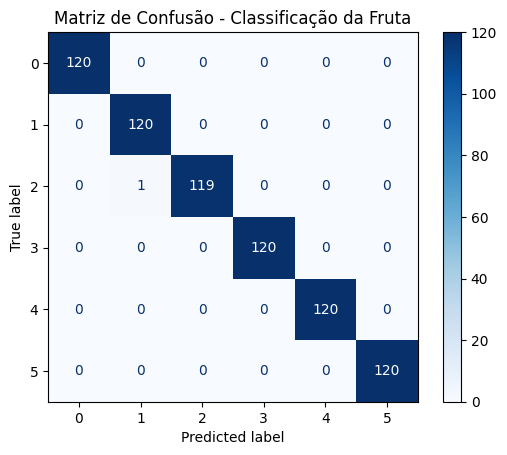

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# Colocar o modelo em modo avaliação
mtl_model.eval()
all_preds_fruit, all_true_fruit = [], []
all_preds_fresh, all_true_fresh = [], []

with torch.no_grad():
    for imgs, y_fruit, y_fresh in test_loader:
        imgs, y_fruit, y_fresh = imgs.to(device), y_fruit.to(device), y_fresh.to(device)
        
        # Forward
        logits_fruit, logits_fresh = mtl_model(imgs)
        
        # Predições
        preds_fruit = logits_fruit.argmax(1).cpu().numpy()
        preds_fresh = logits_fresh.argmax(1).cpu().numpy()
        
        # Valores verdadeiros
        all_preds_fruit.extend(preds_fruit)
        all_preds_fresh.extend(preds_fresh)
        all_true_fruit.extend(y_fruit.cpu().numpy())
        all_true_fresh.extend(y_fresh.cpu().numpy())

# Converter para numpy arrays
import numpy as np
all_preds_fruit = np.array(all_preds_fruit)
all_true_fruit = np.array(all_true_fruit)
all_preds_fresh = np.array(all_preds_fresh)
all_true_fresh = np.array(all_true_fresh)

# Matriz de confusão para FRUTA
cm_fruit = confusion_matrix(all_true_fruit, all_preds_fruit)
disp_fruit = ConfusionMatrixDisplay(cm_fruit)
disp_fruit.plot(cmap="Blues")
plt.title("Matriz de Confusão - Classificação da Fruta")
plt.show()


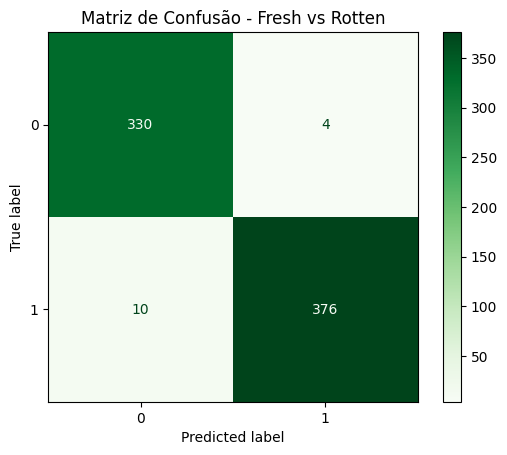

In [ ]:
# Matriz de confusão 
cm_fresh = confusion_matrix(all_true_fresh, all_preds_fresh)
disp_fresh = ConfusionMatrixDisplay(cm_fresh)
disp_fresh.plot(cmap="Greens")
plt.title("Matriz de Confusão - Fresh vs Rotten")
plt.show()


 MÉTRICAS - Classificação da Fruta

Accuracy: 0.9986111111111111
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       120
           1      0.992     1.000     0.996       120
           2      1.000     0.992     0.996       120
           3      1.000     1.000     1.000       120
           4      1.000     1.000     1.000       120
           5      1.000     1.000     1.000       120

    accuracy                          0.999       720
   macro avg      0.999     0.999     0.999       720
weighted avg      0.999     0.999     0.999       720



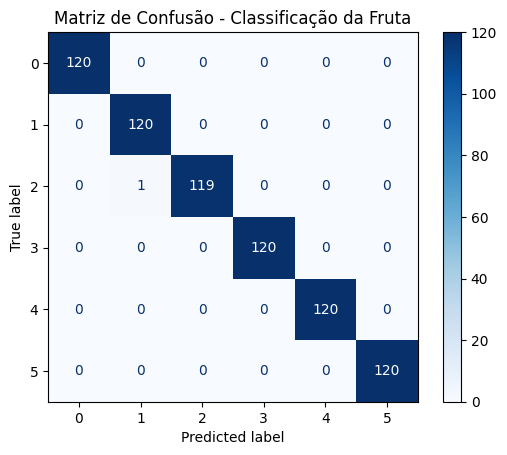


 MÉTRICAS - Fresh vs Rotten

Accuracy: 0.9805555555555555
              precision    recall  f1-score   support

           0      0.971     0.988     0.979       334
           1      0.989     0.974     0.982       386

    accuracy                          0.981       720
   macro avg      0.980     0.981     0.980       720
weighted avg      0.981     0.981     0.981       720



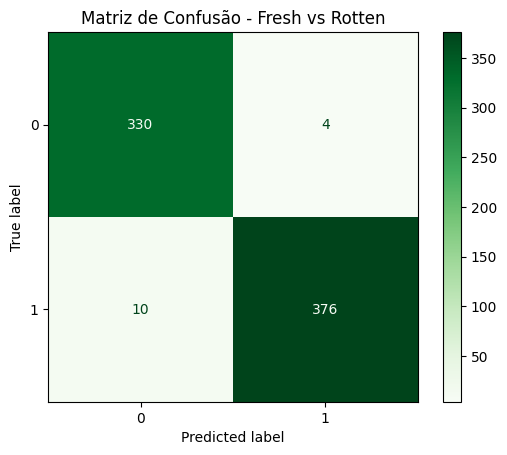

In [33]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np
import torch

# --- 1) Avaliação no conjunto de teste ---
mtl_model.eval()
all_preds_fruit, all_true_fruit = [], []
all_preds_fresh, all_true_fresh = [], []

with torch.no_grad():
    for imgs, y_fruit, y_fresh in test_loader:
        imgs, y_fruit, y_fresh = imgs.to(device), y_fruit.to(device), y_fresh.to(device)
        
        # Forward
        logits_fruit, logits_fresh = mtl_model(imgs)
        
        # Predições
        preds_fruit = logits_fruit.argmax(1).cpu().numpy()
        preds_fresh = logits_fresh.argmax(1).cpu().numpy()
        
        # Valores verdadeiros
        all_preds_fruit.extend(preds_fruit)
        all_preds_fresh.extend(preds_fresh)
        all_true_fruit.extend(y_fruit.cpu().numpy())
        all_true_fresh.extend(y_fresh.cpu().numpy())

# --- 2) Converter para arrays numpy ---
all_preds_fruit = np.array(all_preds_fruit)
all_true_fruit = np.array(all_true_fruit)
all_preds_fresh = np.array(all_preds_fresh)
all_true_fresh = np.array(all_true_fresh)

# --- 3) Métricas para fruta ---
print("\n MÉTRICAS - Classificação da Fruta\n")
print("Accuracy:", accuracy_score(all_true_fruit, all_preds_fruit))
print(classification_report(all_true_fruit, all_preds_fruit, digits=3))

# --- 4) Matriz de confusão - fruta ---
cm_fruit = confusion_matrix(all_true_fruit, all_preds_fruit)
disp_fruit = ConfusionMatrixDisplay(cm_fruit)
disp_fruit.plot(cmap="Blues")
plt.title("Matriz de Confusão - Classificação da Fruta")
plt.show()

# --- 5) Métricas para fresh/rotten ---
print("\n MÉTRICAS - Fresh vs Rotten\n")
print("Accuracy:", accuracy_score(all_true_fresh, all_preds_fresh))
print(classification_report(all_true_fresh, all_preds_fresh, digits=3))

# --- 6) Matriz de confusão - fresh/rotten ---
cm_fresh = confusion_matrix(all_true_fresh, all_preds_fresh)
disp_fresh = ConfusionMatrixDisplay(cm_fresh)
disp_fresh.plot(cmap="Greens")
plt.title("Matriz de Confusão - Fresh vs Rotten")
plt.show()



 Redução média de desperdício (ponderada pela accuracy): 9.80%
T-stat: 130.680, p-value: 0.00000


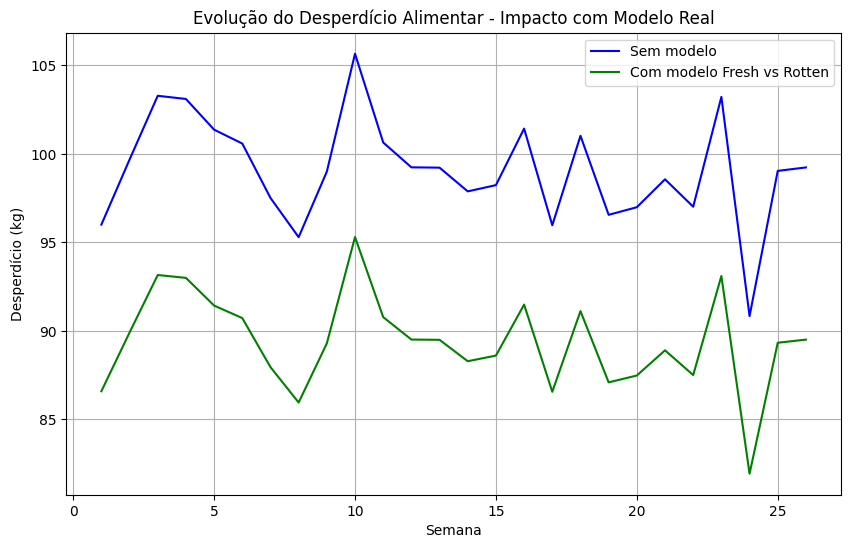

In [34]:
# Simulação baseada na performance real do modelo 

import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt


# 1) Definição da performance do modelo e o objetivo da redução
accuracy_model = 0.9805  # valor de acuracy obtido no modelo 98.3% (fresh vs rotten)
expected_reduction = accuracy_model * 0.10  # obj é reduzir em 10%: multiplica-se pela acuracy para estimar a redução (~9.83%)


# 2) Simulação dos parâmetros de simulação
weeks = np.arange(1, 27) # 27 semanas = 6 meses
stores = [f"Loja_{i}" for i in range(1, 11)]    # simulação de 10 lojas

# 3) Simulação dos dados: para cada loja existe um desperdicio de 80 e 129 kg por semana 
data = []
for store in stores:
    baseline = np.random.uniform(80, 120, size=len(weeks))  # kg desperdiçados sem modelo
    model = baseline * (1 - expected_reduction)  # redução com o modelo aplicado
    for w, b, m in zip(weeks, baseline, model):
        data.append((store, w, b, m))


df = pd.DataFrame(data, columns=["store", "week", "sem_modelo", "com_modelo"])

# Cálculo da redução média
df["reduction_%"] = 100 * (df["sem_modelo"] - df["com_modelo"]) / df["sem_modelo"]
mean_reduction = df["reduction_%"].mean()

print(f"\n Redução média de desperdício (ponderada pela accuracy): {mean_reduction:.2f}%")

# 4) Teste estatístico
# p-value < 0.05 → diferença é estatisticamente significativa.
t_stat, p_value = ttest_rel(df["sem_modelo"], df["com_modelo"])
print(f"T-stat: {t_stat:.3f}, p-value: {p_value:.5f}")


# 5) Visualização dos resultados ao longo do tempo
weekly_baseline = df.groupby("week")["sem_modelo"].mean()
weekly_model = df.groupby("week")["com_modelo"].mean()

plt.figure(figsize=(10,6))
plt.plot(weeks, weekly_baseline, label="Sem modelo", color="blue")
plt.plot(weeks, weekly_model, label="Com modelo Fresh vs Rotten", color="green")
plt.title("Evolução do Desperdício Alimentar - Impacto com Modelo Real")
plt.xlabel("Semana")
plt.ylabel("Desperdício (kg)")
plt.legend()
plt.grid()
plt.show()


In [35]:
df # assumimos um impacto médio igual em todas as lojas

,store,week,sem_modelo,com_modelo,reduction_%
0,Loja_1,1,92.863354,83.758102,9.805
1,Loja_1,2,80.575597,72.675160,9.805
2,Loja_1,3,111.605375,100.662468,9.805
3,Loja_1,4,118.188391,106.600020,9.805
4,Loja_1,5,102.557786,92.501995,9.805
...,...,...,...,...,...
255,Loja_10,22,98.992720,89.286483,9.805
256,Loja_10,23,117.779936,106.231614,9.805
257,Loja_10,24,80.219128,72.353642,9.805
258,Loja_10,25,95.358225,86.008351,9.805


In [36]:
# ==========================================
# SALVAR MODELO PARA DEPLOYMENT
# ==========================================

# Salvar o modelo treinado (apenas os pesos)
torch.save(mtl_model.state_dict(), 'modelo_fresh_continente.pth')
print("✓ Modelo salvo como 'modelo_fresh_continente.pth'")

# Também salvar o modelo completo (alternativa)
torch.save(mtl_model, 'modelo_completo.pth')
print("✓ Modelo completo salvo como 'modelo_completo.pth'")



✓ Modelo salvo como 'modelo_fresh_continente.pth'
✓ Modelo completo salvo como 'modelo_completo.pth'


In [37]:

# Salvar informações importantes do modelo
import pickle

model_config = {
    'num_frutas': len(df_train['fruit'].unique()),
    'frutas_lista': list(df_train['fruit'].unique()),
    'alpha': alpha,  # o peso que usaste no treino (0.5)
    'input_size': 224,
    'mean': [0.485, 0.456, 0.406],
    'std': [0.229, 0.224, 0.225]
}

with open('model_config.pkl', 'wb') as f:
    pickle.dump(model_config, f)
    
print("✓ Configurações salvas como 'model_config.pkl'")

# Mostrar info do modelo salvo
print("\n" + "="*60)
print("FICHEIROS PRONTOS PARA DOWNLOAD")
print("="*60)
print(f"📦 modelo_fresh_continente.pth")
print(f"📦 modelo_completo.pth")
print(f"📦 model_config.pkl")
print()
print(f"🔧 Configurações salvas:")
print(f"   - Número de frutas: {model_config['num_frutas']}")
print(f"   - Frutas: {model_config['frutas_lista']}")
print(f"   - Alpha: {model_config['alpha']}")
print("="*60)

✓ Configurações salvas como 'model_config.pkl'

FICHEIROS PRONTOS PARA DOWNLOAD
📦 modelo_fresh_continente.pth
📦 modelo_completo.pth
📦 model_config.pkl

🔧 Configurações salvas:
   - Número de frutas: 6
   - Frutas: ['oranges', 'tomato', 'capsicum', 'cucumber', 'banana', 'potato']
   - Alpha: 0.7
